In [1]:
import numpy as np
import torch
import pandas as pd

import matplotlib.pyplot as plt

from collections import namedtuple
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import data_processing as dp
import average_classifier_torch as ac
import model_utilities_torch as mu 
import evaluation as ev
import vocab as vo

In [3]:
vocab, all_labels, sents, labels = dp.load_problem(lang='ma')

In [4]:
!python -c "import torch; print(torch.cuda.is_available(), torch.cuda.device_count())"

True 1


In [5]:
!pwd

/media/itasarom/7158f0d7-af1d-45d4-855f-86204aed5a8b/Projects/diplom/simple_classifier


In [6]:
torch.cuda.is_available()

True

In [7]:
torch.cuda.device_count()

1

In [8]:
import os
os.environ["LD_LIBRARY_PATH"]

'/usr/local/cuda-9.0/lib64::/usr/lib/x86_64-linux-gnu:/usr/local/lib:/usr/local/cuda/lib64:/usr/lib/x86_64-linux-gnu:/usr/lib/nvidia-387'

In [9]:
import sys
sys.executable

'/home/itasarom/.programs/anaconda2/envs/torch/bin/python'

In [10]:
sys.argv[0]

'/home/itasarom/.programs/anaconda2/envs/torch/lib/python3.5/site-packages/ipykernel/__main__.py'

In [11]:
# vocab.embeddings.dtype

In [12]:
batch_sampler = vo.BatchSampler(sents=sents, labels=labels, vocab=vocab, all_labels=all_labels, batch_size=1024)

In [13]:
cls = ac.AverageClassifier(vocab, n_topics=len(all_labels))

In [14]:
cls = cls.cuda()

In [15]:
# del cls
torch.cuda.empty_cache()

In [16]:
# torch.cuda.

In [17]:
cls

AverageClassifier(
  (word_embeddings): Embedding(25046, 100)
  (dense): Linear(in_features=100, out_features=1024)
  (logits_layer): Linear(in_features=1024, out_features=26)
  (softmax_layer): Softmax()
  (loss_function): CrossEntropyLoss(
  )
)

In [18]:
trainer = mu.Trainer(cls)

In [19]:
trainer.train(batch_sampler=batch_sampler, n_epochs=200, max_iterations=10**5, save_path="./checkpoints/checkpoint.ckpt", save_every=10)

0it [00:00, ?it/s]

Starting epoch  0


9it [00:01,  4.83it/s]
1it [00:00,  6.95it/s]

After epoch 0 validation_loss = 2.8005504608154297, train_loss = 3.0585720539093018
Starting epoch  1


9it [00:01,  6.54it/s]
1it [00:00,  6.90it/s]

After epoch 1 validation_loss = 2.5662519931793213, train_loss = 2.7156691551208496
Starting epoch  2


9it [00:01,  6.90it/s]
1it [00:00,  6.81it/s]

After epoch 2 validation_loss = 2.3473687171936035, train_loss = 2.496708631515503
Starting epoch  3


9it [00:01,  6.59it/s]
1it [00:00,  5.32it/s]

After epoch 3 validation_loss = 2.0804495811462402, train_loss = 2.2490978240966797
Starting epoch  4


9it [00:01,  5.95it/s]
1it [00:00,  5.96it/s]

After epoch 4 validation_loss = 1.8301929235458374, train_loss = 1.9801169633865356
Starting epoch  5


9it [00:01,  5.95it/s]
1it [00:00,  5.80it/s]

After epoch 5 validation_loss = 1.6253257989883423, train_loss = 1.7390079498291016
Starting epoch  6


9it [00:01,  6.34it/s]
1it [00:00,  6.77it/s]

After epoch 6 validation_loss = 1.4742375612258911, train_loss = 1.550732970237732
Starting epoch  7


9it [00:01,  6.75it/s]
1it [00:00,  6.46it/s]

After epoch 7 validation_loss = 1.3665153980255127, train_loss = 1.4148794412612915
Starting epoch  8


9it [00:01,  5.95it/s]
1it [00:00,  5.35it/s]

After epoch 8 validation_loss = 1.2896323204040527, train_loss = 1.318861484527588
Starting epoch  9


9it [00:01,  5.89it/s]
1it [00:00,  6.12it/s]

After epoch 9 validation_loss = 1.23135244846344, train_loss = 1.2491729259490967
Starting epoch  10


9it [00:01,  6.02it/s]
1it [00:00,  5.79it/s]

After epoch 10 validation_loss = 1.1848516464233398, train_loss = 1.196667194366455
Starting epoch  11


9it [00:01,  6.20it/s]
1it [00:00,  6.10it/s]

After epoch 11 validation_loss = 1.1464711427688599, train_loss = 1.1554405689239502
Starting epoch  12


9it [00:01,  6.42it/s]
1it [00:00,  5.51it/s]

After epoch 12 validation_loss = 1.1138619184494019, train_loss = 1.1217198371887207
Starting epoch  13


9it [00:01,  6.13it/s]
1it [00:00,  5.67it/s]

After epoch 13 validation_loss = 1.08547043800354, train_loss = 1.0932419300079346
Starting epoch  14


9it [00:01,  6.15it/s]
1it [00:00,  5.45it/s]

After epoch 14 validation_loss = 1.0604994297027588, train_loss = 1.0685721635818481
Starting epoch  15


9it [00:01,  5.96it/s]
1it [00:00,  6.44it/s]

After epoch 15 validation_loss = 1.0382119417190552, train_loss = 1.0468358993530273
Starting epoch  16


9it [00:01,  6.77it/s]
1it [00:00,  5.78it/s]

After epoch 16 validation_loss = 1.0181727409362793, train_loss = 1.02742600440979
Starting epoch  17


9it [00:01,  5.86it/s]
1it [00:00,  6.07it/s]

After epoch 17 validation_loss = 1.0000050067901611, train_loss = 1.0098986625671387
Starting epoch  18


9it [00:01,  6.16it/s]
1it [00:00,  5.27it/s]

After epoch 18 validation_loss = 0.9834822416305542, train_loss = 0.9939281940460205
Starting epoch  19


9it [00:01,  5.07it/s]
0it [00:00, ?it/s]

After epoch 19 validation_loss = 0.9683430194854736, train_loss = 0.9792798161506653
Starting epoch  20


9it [00:01,  5.75it/s]
0it [00:00, ?it/s]

After epoch 20 validation_loss = 0.9544622898101807, train_loss = 0.965749979019165
Starting epoch  21


9it [00:01,  5.16it/s]
1it [00:00,  6.05it/s]

After epoch 21 validation_loss = 0.9416307806968689, train_loss = 0.9531993865966797
Starting epoch  22


9it [00:01,  6.34it/s]
0it [00:00, ?it/s]

After epoch 22 validation_loss = 0.9297256469726562, train_loss = 0.9414799213409424
Starting epoch  23


9it [00:01,  5.79it/s]
1it [00:00,  6.55it/s]

After epoch 23 validation_loss = 0.9186900854110718, train_loss = 0.9305219650268555
Starting epoch  24


9it [00:01,  6.45it/s]
1it [00:00,  6.62it/s]

After epoch 24 validation_loss = 0.9082915186882019, train_loss = 0.9202387928962708
Starting epoch  25


9it [00:01,  6.47it/s]
1it [00:00,  6.11it/s]

After epoch 25 validation_loss = 0.8985612988471985, train_loss = 0.910510778427124
Starting epoch  26


9it [00:01,  6.46it/s]
1it [00:00,  6.64it/s]

After epoch 26 validation_loss = 0.889421820640564, train_loss = 0.901341438293457
Starting epoch  27


9it [00:01,  6.61it/s]
1it [00:00,  6.40it/s]

After epoch 27 validation_loss = 0.8807448148727417, train_loss = 0.8926287889480591
Starting epoch  28


9it [00:01,  6.48it/s]
1it [00:00,  6.38it/s]

After epoch 28 validation_loss = 0.8725407123565674, train_loss = 0.884346604347229
Starting epoch  29


9it [00:01,  6.36it/s]
1it [00:00,  5.92it/s]

After epoch 29 validation_loss = 0.864646315574646, train_loss = 0.8764024376869202
Starting epoch  30


9it [00:01,  5.83it/s]
1it [00:00,  5.28it/s]

After epoch 30 validation_loss = 0.8570979237556458, train_loss = 0.8688348531723022
Starting epoch  31


9it [00:01,  6.12it/s]
1it [00:00,  6.61it/s]

After epoch 31 validation_loss = 0.8498595952987671, train_loss = 0.8615859150886536
Starting epoch  32


9it [00:01,  6.25it/s]
1it [00:00,  6.45it/s]

After epoch 32 validation_loss = 0.8428298830986023, train_loss = 0.8546366095542908
Starting epoch  33


9it [00:01,  6.54it/s]
1it [00:00,  6.30it/s]

After epoch 33 validation_loss = 0.8361185193061829, train_loss = 0.8479680418968201
Starting epoch  34


9it [00:01,  6.26it/s]
1it [00:00,  6.02it/s]

After epoch 34 validation_loss = 0.8295894265174866, train_loss = 0.8415372967720032
Starting epoch  35


9it [00:01,  6.10it/s]
1it [00:00,  6.03it/s]

After epoch 35 validation_loss = 0.8233557939529419, train_loss = 0.8353460431098938
Starting epoch  36


9it [00:01,  6.32it/s]
1it [00:00,  6.18it/s]

After epoch 36 validation_loss = 0.8172106742858887, train_loss = 0.8293625116348267
Starting epoch  37


9it [00:01,  6.40it/s]
1it [00:00,  6.36it/s]

After epoch 37 validation_loss = 0.8112508654594421, train_loss = 0.8235703110694885
Starting epoch  38


9it [00:01,  6.47it/s]
1it [00:00,  6.23it/s]

After epoch 38 validation_loss = 0.8054900169372559, train_loss = 0.8179924488067627
Starting epoch  39


9it [00:01,  6.42it/s]
1it [00:00,  6.00it/s]

After epoch 39 validation_loss = 0.7998496890068054, train_loss = 0.8125587105751038
Starting epoch  40


9it [00:01,  6.40it/s]
1it [00:00,  6.42it/s]

After epoch 40 validation_loss = 0.7943317890167236, train_loss = 0.807304859161377
Starting epoch  41


9it [00:01,  6.44it/s]
1it [00:00,  6.00it/s]

After epoch 41 validation_loss = 0.7889995574951172, train_loss = 0.8021959066390991
Starting epoch  42


9it [00:01,  6.48it/s]
1it [00:00,  5.96it/s]

After epoch 42 validation_loss = 0.7837156057357788, train_loss = 0.7972323894500732
Starting epoch  43


9it [00:01,  6.27it/s]
1it [00:00,  5.93it/s]

After epoch 43 validation_loss = 0.7786374688148499, train_loss = 0.7924095988273621
Starting epoch  44


9it [00:01,  6.31it/s]
1it [00:00,  6.50it/s]

After epoch 44 validation_loss = 0.7736033797264099, train_loss = 0.7876958847045898
Starting epoch  45


9it [00:01,  6.28it/s]
1it [00:00,  6.39it/s]

After epoch 45 validation_loss = 0.7687287330627441, train_loss = 0.7831169962882996
Starting epoch  46


9it [00:01,  6.48it/s]
1it [00:00,  5.80it/s]

After epoch 46 validation_loss = 0.763946533203125, train_loss = 0.7786505222320557
Starting epoch  47


9it [00:01,  6.47it/s]
1it [00:00,  5.92it/s]

After epoch 47 validation_loss = 0.7592960000038147, train_loss = 0.7742769122123718
Starting epoch  48


9it [00:01,  6.51it/s]
1it [00:00,  6.29it/s]

After epoch 48 validation_loss = 0.7546885013580322, train_loss = 0.7700133919715881
Starting epoch  49


9it [00:01,  6.36it/s]
1it [00:00,  6.33it/s]

After epoch 49 validation_loss = 0.7501879930496216, train_loss = 0.765831708908081
Starting epoch  50


9it [00:01,  6.46it/s]
1it [00:00,  6.31it/s]

After epoch 50 validation_loss = 0.7457997798919678, train_loss = 0.7617228627204895
Starting epoch  51


9it [00:01,  6.52it/s]
1it [00:00,  6.26it/s]

After epoch 51 validation_loss = 0.7414615750312805, train_loss = 0.7577105760574341
Starting epoch  52


9it [00:01,  6.56it/s]
1it [00:00,  6.37it/s]

After epoch 52 validation_loss = 0.7372328639030457, train_loss = 0.7537526488304138
Starting epoch  53


9it [00:01,  6.61it/s]
1it [00:00,  6.45it/s]

After epoch 53 validation_loss = 0.7329862713813782, train_loss = 0.7498579025268555
Starting epoch  54


9it [00:01,  6.24it/s]
1it [00:00,  5.40it/s]

After epoch 54 validation_loss = 0.728780210018158, train_loss = 0.7460435032844543
Starting epoch  55


9it [00:01,  6.10it/s]
1it [00:00,  6.26it/s]

After epoch 55 validation_loss = 0.7246952652931213, train_loss = 0.7422758340835571
Starting epoch  56


9it [00:01,  6.49it/s]
1it [00:00,  6.44it/s]

After epoch 56 validation_loss = 0.7205572724342346, train_loss = 0.7385596036911011
Starting epoch  57


9it [00:01,  6.66it/s]
1it [00:00,  6.02it/s]

After epoch 57 validation_loss = 0.7165845036506653, train_loss = 0.7349184155464172
Starting epoch  58


9it [00:01,  6.61it/s]
1it [00:00,  5.96it/s]

After epoch 58 validation_loss = 0.7125557065010071, train_loss = 0.7312823534011841
Starting epoch  59


9it [00:01,  6.54it/s]
1it [00:00,  6.12it/s]

After epoch 59 validation_loss = 0.7085719108581543, train_loss = 0.7277235388755798
Starting epoch  60


9it [00:01,  6.52it/s]
1it [00:00,  6.49it/s]

After epoch 60 validation_loss = 0.704760730266571, train_loss = 0.7242233753204346
Starting epoch  61


9it [00:01,  6.52it/s]
1it [00:00,  5.94it/s]

After epoch 61 validation_loss = 0.7008647918701172, train_loss = 0.7207247614860535
Starting epoch  62


9it [00:01,  5.87it/s]
1it [00:00,  6.53it/s]

After epoch 62 validation_loss = 0.6969717741012573, train_loss = 0.7172590494155884
Starting epoch  63


9it [00:01,  6.49it/s]
1it [00:00,  5.89it/s]

After epoch 63 validation_loss = 0.6931993365287781, train_loss = 0.713877260684967
Starting epoch  64


9it [00:01,  6.07it/s]
1it [00:00,  5.57it/s]

After epoch 64 validation_loss = 0.6894333362579346, train_loss = 0.7105114459991455
Starting epoch  65


9it [00:01,  5.62it/s]
0it [00:00, ?it/s]

After epoch 65 validation_loss = 0.6856973171234131, train_loss = 0.7071763277053833
Starting epoch  66


9it [00:01,  6.13it/s]
1it [00:00,  6.39it/s]

After epoch 66 validation_loss = 0.6820089817047119, train_loss = 0.703872561454773
Starting epoch  67


9it [00:01,  6.29it/s]
1it [00:00,  6.22it/s]

After epoch 67 validation_loss = 0.6782549023628235, train_loss = 0.7006024122238159
Starting epoch  68


9it [00:01,  6.73it/s]
1it [00:00,  5.40it/s]

After epoch 68 validation_loss = 0.674644947052002, train_loss = 0.6973788738250732
Starting epoch  69


9it [00:01,  4.96it/s]
1it [00:00,  5.55it/s]

After epoch 69 validation_loss = 0.6710026860237122, train_loss = 0.6941613554954529
Starting epoch  70


9it [00:01,  5.93it/s]
1it [00:00,  5.34it/s]

After epoch 70 validation_loss = 0.6674312949180603, train_loss = 0.6909728646278381
Starting epoch  71


9it [00:01,  5.62it/s]
1it [00:00,  6.21it/s]

After epoch 71 validation_loss = 0.6638413667678833, train_loss = 0.6878114342689514
Starting epoch  72


9it [00:01,  5.76it/s]
1it [00:00,  5.51it/s]

After epoch 72 validation_loss = 0.660346508026123, train_loss = 0.6846537590026855
Starting epoch  73


9it [00:01,  6.23it/s]
1it [00:00,  6.29it/s]

After epoch 73 validation_loss = 0.6567599177360535, train_loss = 0.6815123558044434
Starting epoch  74


9it [00:01,  6.56it/s]
1it [00:00,  6.21it/s]

After epoch 74 validation_loss = 0.653268039226532, train_loss = 0.6784072518348694
Starting epoch  75


9it [00:01,  5.94it/s]
0it [00:00, ?it/s]

After epoch 75 validation_loss = 0.6497628688812256, train_loss = 0.6753035187721252
Starting epoch  76


9it [00:01,  5.72it/s]
1it [00:00,  5.81it/s]

After epoch 76 validation_loss = 0.6463755965232849, train_loss = 0.6722550392150879
Starting epoch  77


9it [00:01,  5.19it/s]
0it [00:00, ?it/s]

After epoch 77 validation_loss = 0.6429089307785034, train_loss = 0.6692178249359131
Starting epoch  78


9it [00:01,  5.08it/s]
0it [00:00, ?it/s]

After epoch 78 validation_loss = 0.6394498944282532, train_loss = 0.6661615967750549
Starting epoch  79


9it [00:01,  5.03it/s]
0it [00:00, ?it/s]

After epoch 79 validation_loss = 0.6360610723495483, train_loss = 0.663179337978363
Starting epoch  80


9it [00:02,  4.40it/s]
0it [00:00, ?it/s]

After epoch 80 validation_loss = 0.6326532363891602, train_loss = 0.6601548194885254
Starting epoch  81


9it [00:01,  5.81it/s]
1it [00:00,  6.36it/s]

After epoch 81 validation_loss = 0.6293279528617859, train_loss = 0.6571932435035706
Starting epoch  82


9it [00:01,  6.26it/s]
1it [00:00,  5.82it/s]

After epoch 82 validation_loss = 0.625909149646759, train_loss = 0.654205858707428
Starting epoch  83


9it [00:01,  5.54it/s]
1it [00:00,  6.14it/s]

After epoch 83 validation_loss = 0.6226270794868469, train_loss = 0.6512558460235596
Starting epoch  84


9it [00:01,  6.10it/s]
1it [00:00,  5.75it/s]

After epoch 84 validation_loss = 0.6193668246269226, train_loss = 0.6483235955238342
Starting epoch  85


9it [00:01,  6.08it/s]
1it [00:00,  6.35it/s]

After epoch 85 validation_loss = 0.6160166263580322, train_loss = 0.6453542709350586
Starting epoch  86


9it [00:01,  6.01it/s]
1it [00:00,  6.08it/s]

After epoch 86 validation_loss = 0.6128118634223938, train_loss = 0.6424962878227234
Starting epoch  87


9it [00:01,  6.17it/s]
1it [00:00,  5.70it/s]

After epoch 87 validation_loss = 0.6095950603485107, train_loss = 0.639615535736084
Starting epoch  88


9it [00:01,  6.40it/s]
1it [00:00,  5.71it/s]

After epoch 88 validation_loss = 0.6063230037689209, train_loss = 0.6367186903953552
Starting epoch  89


9it [00:01,  6.21it/s]
1it [00:00,  6.53it/s]

After epoch 89 validation_loss = 0.60310298204422, train_loss = 0.6338686347007751
Starting epoch  90


9it [00:01,  6.40it/s]
1it [00:00,  6.12it/s]

After epoch 90 validation_loss = 0.5999318361282349, train_loss = 0.6310293674468994
Starting epoch  91


9it [00:01,  6.34it/s]
1it [00:00,  5.82it/s]

After epoch 91 validation_loss = 0.5967424511909485, train_loss = 0.628175675868988
Starting epoch  92


9it [00:01,  6.16it/s]
1it [00:00,  6.00it/s]

After epoch 92 validation_loss = 0.5935588479042053, train_loss = 0.6253582835197449
Starting epoch  93


9it [00:01,  6.35it/s]
1it [00:00,  6.34it/s]

After epoch 93 validation_loss = 0.5904056429862976, train_loss = 0.6225599646568298
Starting epoch  94


9it [00:01,  6.39it/s]
1it [00:00,  6.35it/s]

After epoch 94 validation_loss = 0.587256669998169, train_loss = 0.619737982749939
Starting epoch  95


9it [00:01,  6.42it/s]
1it [00:00,  6.37it/s]

After epoch 95 validation_loss = 0.5841741561889648, train_loss = 0.616981029510498
Starting epoch  96


9it [00:01,  6.34it/s]
1it [00:00,  6.01it/s]

After epoch 96 validation_loss = 0.5810614824295044, train_loss = 0.6142052412033081
Starting epoch  97


9it [00:01,  6.48it/s]
1it [00:00,  5.79it/s]

After epoch 97 validation_loss = 0.5780041217803955, train_loss = 0.6114304661750793
Starting epoch  98


9it [00:01,  6.30it/s]
0it [00:00, ?it/s]

After epoch 98 validation_loss = 0.574924111366272, train_loss = 0.6086703538894653
Starting epoch  99


9it [00:01,  5.75it/s]
1it [00:00,  5.66it/s]

After epoch 99 validation_loss = 0.5718138813972473, train_loss = 0.6059147119522095
Starting epoch  100


9it [00:01,  6.02it/s]
1it [00:00,  6.12it/s]

After epoch 100 validation_loss = 0.5688493847846985, train_loss = 0.6032069325447083
Starting epoch  101


9it [00:01,  6.01it/s]
1it [00:00,  6.39it/s]

After epoch 101 validation_loss = 0.5658218264579773, train_loss = 0.6005160212516785
Starting epoch  102


9it [00:01,  6.00it/s]
1it [00:00,  5.26it/s]

After epoch 102 validation_loss = 0.5627723932266235, train_loss = 0.597809374332428
Starting epoch  103


9it [00:01,  6.18it/s]
1it [00:00,  6.26it/s]

After epoch 103 validation_loss = 0.5598714351654053, train_loss = 0.5951106548309326
Starting epoch  104


9it [00:01,  6.41it/s]
1it [00:00,  5.70it/s]

After epoch 104 validation_loss = 0.5568146109580994, train_loss = 0.5924444794654846
Starting epoch  105


9it [00:01,  5.35it/s]
1it [00:00,  5.48it/s]

After epoch 105 validation_loss = 0.5538375973701477, train_loss = 0.5897501111030579
Starting epoch  106


9it [00:01,  5.08it/s]
0it [00:00, ?it/s]

After epoch 106 validation_loss = 0.5509132146835327, train_loss = 0.5870994329452515
Starting epoch  107


9it [00:01,  5.74it/s]
0it [00:00, ?it/s]

After epoch 107 validation_loss = 0.547978401184082, train_loss = 0.5844537019729614
Starting epoch  108


9it [00:01,  5.84it/s]
1it [00:00,  5.66it/s]

After epoch 108 validation_loss = 0.5450906157493591, train_loss = 0.5818250179290771
Starting epoch  109


9it [00:01,  6.09it/s]
1it [00:00,  5.92it/s]

After epoch 109 validation_loss = 0.5420762896537781, train_loss = 0.5791856646537781
Starting epoch  110


9it [00:01,  6.40it/s]
1it [00:00,  6.35it/s]

After epoch 110 validation_loss = 0.5392342805862427, train_loss = 0.5766145586967468
Starting epoch  111


9it [00:01,  6.49it/s]
1it [00:00,  5.67it/s]

After epoch 111 validation_loss = 0.5362451672554016, train_loss = 0.5740104913711548
Starting epoch  112


9it [00:01,  6.40it/s]
1it [00:00,  6.43it/s]

After epoch 112 validation_loss = 0.5335062742233276, train_loss = 0.5714747309684753
Starting epoch  113


9it [00:01,  5.94it/s]
1it [00:00,  6.20it/s]

After epoch 113 validation_loss = 0.530586838722229, train_loss = 0.5689175128936768
Starting epoch  114


9it [00:01,  6.51it/s]
1it [00:00,  6.52it/s]

After epoch 114 validation_loss = 0.5277549624443054, train_loss = 0.5663534998893738
Starting epoch  115


9it [00:01,  6.48it/s]
1it [00:00,  6.58it/s]

After epoch 115 validation_loss = 0.5248743295669556, train_loss = 0.5638144016265869
Starting epoch  116


9it [00:01,  6.56it/s]
1it [00:00,  5.91it/s]

After epoch 116 validation_loss = 0.5222291350364685, train_loss = 0.5613157749176025
Starting epoch  117


9it [00:01,  6.34it/s]
1it [00:00,  5.82it/s]

After epoch 117 validation_loss = 0.5194103717803955, train_loss = 0.5587992072105408
Starting epoch  118


9it [00:01,  6.55it/s]
1it [00:00,  5.86it/s]

After epoch 118 validation_loss = 0.5166623592376709, train_loss = 0.5562677383422852
Starting epoch  119


9it [00:01,  6.24it/s]
1it [00:00,  6.08it/s]

After epoch 119 validation_loss = 0.5138787031173706, train_loss = 0.5537541508674622
Starting epoch  120


9it [00:01,  6.35it/s]
1it [00:00,  5.68it/s]

After epoch 120 validation_loss = 0.5111258029937744, train_loss = 0.5512717366218567
Starting epoch  121


9it [00:01,  6.37it/s]
1it [00:00,  5.64it/s]

After epoch 121 validation_loss = 0.5083293318748474, train_loss = 0.5487597584724426
Starting epoch  122


9it [00:01,  6.15it/s]
1it [00:00,  5.65it/s]

After epoch 122 validation_loss = 0.5057172775268555, train_loss = 0.5462964177131653
Starting epoch  123


9it [00:01,  5.61it/s]
1it [00:00,  5.65it/s]

After epoch 123 validation_loss = 0.5030540227890015, train_loss = 0.5438879728317261
Starting epoch  124


9it [00:01,  6.10it/s]
0it [00:00, ?it/s]

After epoch 124 validation_loss = 0.5003955960273743, train_loss = 0.5414184927940369
Starting epoch  125


9it [00:01,  5.65it/s]
1it [00:00,  5.43it/s]

After epoch 125 validation_loss = 0.4977685213088989, train_loss = 0.5389742851257324
Starting epoch  126


9it [00:01,  5.52it/s]
1it [00:00,  5.63it/s]

After epoch 126 validation_loss = 0.4950793981552124, train_loss = 0.5365748405456543
Starting epoch  127


9it [00:01,  5.80it/s]
1it [00:00,  5.47it/s]

After epoch 127 validation_loss = 0.4923875629901886, train_loss = 0.5341376066207886
Starting epoch  128


9it [00:01,  6.01it/s]
1it [00:00,  5.49it/s]

After epoch 128 validation_loss = 0.48975998163223267, train_loss = 0.5317280888557434
Starting epoch  129


9it [00:01,  5.74it/s]
1it [00:00,  5.63it/s]

After epoch 129 validation_loss = 0.4871736466884613, train_loss = 0.5293804407119751
Starting epoch  130


9it [00:01,  6.01it/s]
1it [00:00,  6.04it/s]

After epoch 130 validation_loss = 0.4845437705516815, train_loss = 0.5269947648048401
Starting epoch  131


9it [00:01,  6.12it/s]
1it [00:00,  5.52it/s]

After epoch 131 validation_loss = 0.48201555013656616, train_loss = 0.5246522426605225
Starting epoch  132


9it [00:01,  6.02it/s]
1it [00:00,  6.25it/s]

After epoch 132 validation_loss = 0.4795350432395935, train_loss = 0.5222960114479065
Starting epoch  133


9it [00:01,  6.16it/s]
1it [00:00,  6.12it/s]

After epoch 133 validation_loss = 0.4769737422466278, train_loss = 0.5199198722839355
Starting epoch  134


9it [00:01,  6.14it/s]
1it [00:00,  5.68it/s]

After epoch 134 validation_loss = 0.47433462738990784, train_loss = 0.517592191696167
Starting epoch  135


9it [00:01,  6.14it/s]
1it [00:00,  6.03it/s]

After epoch 135 validation_loss = 0.47187939286231995, train_loss = 0.515265941619873
Starting epoch  136


9it [00:01,  6.06it/s]
1it [00:00,  6.20it/s]

After epoch 136 validation_loss = 0.46935826539993286, train_loss = 0.5129584670066833
Starting epoch  137


9it [00:01,  6.10it/s]
1it [00:00,  5.83it/s]

After epoch 137 validation_loss = 0.46681109070777893, train_loss = 0.5106484293937683
Starting epoch  138


9it [00:01,  5.85it/s]
1it [00:00,  5.45it/s]

After epoch 138 validation_loss = 0.4643324911594391, train_loss = 0.5083578824996948
Starting epoch  139


9it [00:01,  5.83it/s]
1it [00:00,  6.20it/s]

After epoch 139 validation_loss = 0.4619734287261963, train_loss = 0.5060911774635315
Starting epoch  140


9it [00:01,  6.08it/s]
1it [00:00,  5.53it/s]

After epoch 140 validation_loss = 0.45950740575790405, train_loss = 0.5037888288497925
Starting epoch  141


9it [00:01,  5.78it/s]
1it [00:00,  5.29it/s]

After epoch 141 validation_loss = 0.4568794071674347, train_loss = 0.5014808177947998
Starting epoch  142


9it [00:01,  6.19it/s]
1it [00:00,  6.09it/s]

After epoch 142 validation_loss = 0.45460930466651917, train_loss = 0.4992462694644928
Starting epoch  143


9it [00:01,  6.24it/s]
1it [00:00,  5.85it/s]

After epoch 143 validation_loss = 0.4521820843219757, train_loss = 0.49700620770454407
Starting epoch  144


9it [00:01,  6.09it/s]
1it [00:00,  6.24it/s]

After epoch 144 validation_loss = 0.4498988687992096, train_loss = 0.4947417080402374
Starting epoch  145


9it [00:01,  5.66it/s]
0it [00:00, ?it/s]

After epoch 145 validation_loss = 0.4472846984863281, train_loss = 0.4924412965774536
Starting epoch  146


9it [00:01,  5.17it/s]
0it [00:00, ?it/s]

After epoch 146 validation_loss = 0.44495484232902527, train_loss = 0.490237295627594
Starting epoch  147


9it [00:01,  5.04it/s]
0it [00:00, ?it/s]

After epoch 147 validation_loss = 0.44260209798812866, train_loss = 0.4880107641220093
Starting epoch  148


9it [00:01,  5.66it/s]
1it [00:00,  5.26it/s]

After epoch 148 validation_loss = 0.44019174575805664, train_loss = 0.48578569293022156
Starting epoch  149


9it [00:01,  5.42it/s]
0it [00:00, ?it/s]

After epoch 149 validation_loss = 0.43789535760879517, train_loss = 0.48359572887420654
Starting epoch  150


9it [00:01,  5.64it/s]
1it [00:00,  5.25it/s]

After epoch 150 validation_loss = 0.43553411960601807, train_loss = 0.4813744127750397
Starting epoch  151


9it [00:01,  5.32it/s]
1it [00:00,  6.13it/s]

After epoch 151 validation_loss = 0.4331062138080597, train_loss = 0.47915875911712646
Starting epoch  152


9it [00:01,  5.70it/s]
1it [00:00,  5.09it/s]

After epoch 152 validation_loss = 0.43090543150901794, train_loss = 0.4770139157772064
Starting epoch  153


9it [00:01,  5.78it/s]
1it [00:00,  5.80it/s]

After epoch 153 validation_loss = 0.4285302758216858, train_loss = 0.4748411178588867
Starting epoch  154


KeyboardInterrupt: 

In [20]:
x, mask, y = batch_sampler.get_test()

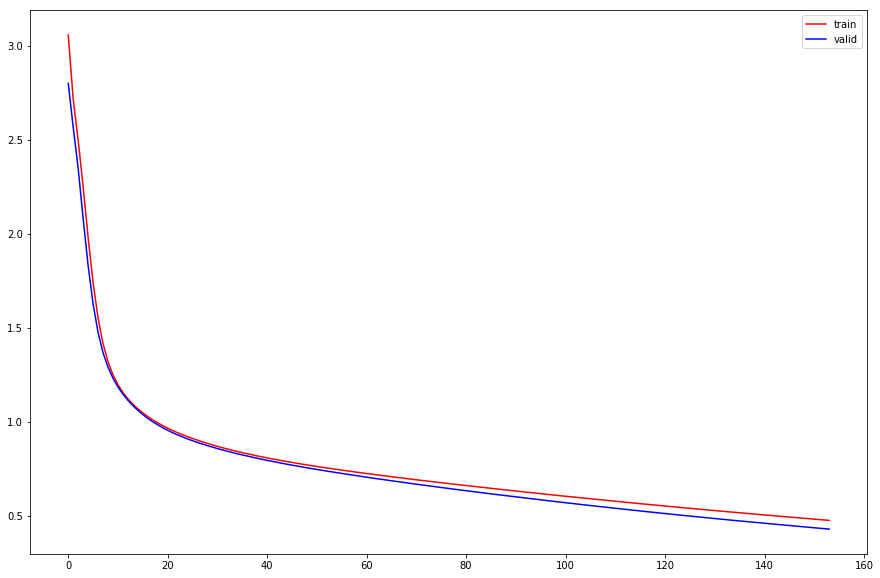

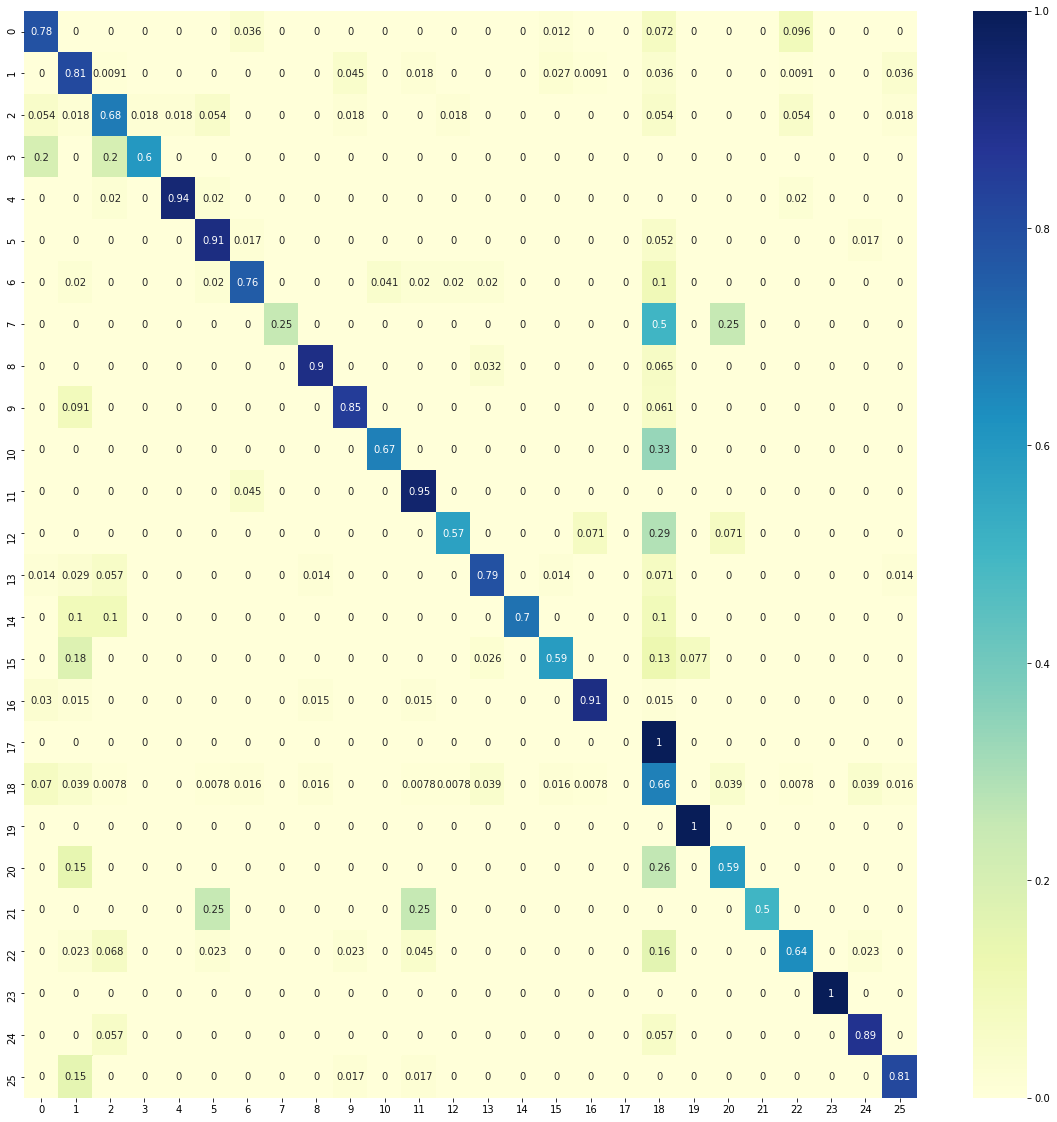

In [21]:
res = ev.describe(trainer, x, mask, y)

In [22]:
res

((797, 1024, 0.7783203125),
 {0: (65, 81, 0.8024691358024691),
  1: (89, 124, 0.717741935483871),
  2: (38, 52, 0.7307692307692307),
  3: (3, 4, 0.75),
  4: (46, 47, 0.9787234042553191),
  5: (53, 61, 0.8688524590163934),
  6: (37, 45, 0.8222222222222222),
  7: (1, 1, 1.0),
  8: (28, 32, 0.875),
  9: (28, 36, 0.7777777777777778),
  10: (2, 4, 0.5),
  11: (42, 51, 0.8235294117647058),
  12: (8, 11, 0.7272727272727273),
  13: (55, 63, 0.873015873015873),
  14: (7, 7, 1.0),
  15: (23, 30, 0.7666666666666667),
  16: (60, 63, 0.9523809523809523),
  17: (0, 0, 0.0),
  18: (85, 146, 0.5821917808219178),
  19: (1, 4, 0.25),
  20: (16, 23, 0.6956521739130435),
  21: (2, 2, 1.0),
  22: (28, 42, 0.6666666666666666),
  23: (1, 1, 1.0),
  24: (31, 38, 0.8157894736842105),
  25: (48, 56, 0.8571428571428571)},
 {0: (65, 83, 0.7831325301204819),
  1: (89, 110, 0.8090909090909091),
  2: (38, 56, 0.6785714285714286),
  3: (3, 5, 0.6),
  4: (46, 49, 0.9387755102040817),
  5: (53, 58, 0.9137931034482759),

In [280]:
# batch_sampler.sents[0]